<a href="https://colab.research.google.com/github/aziz0519/Python-Programs/blob/master/Text_analytics_of_blockchain_whitepapers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mount drive

from google.colab import drive
from google.colab import files 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#import libraries

import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#load data
data = pd.read_json(r"/content/drive/My Drive/df.json",orient='colunms')
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1
10,AceD,\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ...,11710,aced,18/07/2018,0.343592,09/09/2019,0.010304,-0.333287,1
100,Bitcoin Private,\n \n\n \n\n \n\nW H I T E P A P E R \n\n \n ...,4989,bitcoin-private,21/03/2018,34.124885,09/09/2019,0.228600,-33.896285,1
101,Bitcoin Rhodium,WHITEPAPER\n\n Limited - Rare - Resistant\n\nB...,1633,bitcoin-rhodium,01/02/2019,5.138751,09/09/2019,20.343213,15.204461,0


In [4]:
data.shape

(884, 10)

In [5]:
data['text'][0]

'The 0Chain Consensus Protocol\n\nJonathan Katz1(cid:63), Thomas Austin2, Siva Dirisala3, and Saswata Basu3\n\n1 Dept. of Computer Science, University of Maryland.\n\n2 0Chain LLC and San Jose State University.\n\n3 0Chain LLC.\n\nAbstract. We describe the 0Chain blockchain ecosystem, including a\nnew consensus protocol oﬀering fast ﬁnality. We provide proofs of security\nfor the protocol, along with experiment results validating its eﬃciency\nunder realistic network conditions.\n\n1\n\nIntroduction\n\nSince the advent of Bitcoin [Nak09], the blockchain has revolutionized the world\nof cryptocurrencies and distributed computation. Ethereum [Woo14] further de-\nveloped this promise by integrating Turing-complete smart contracts into the\nblockchain for building distributed applications (dApps).\n\nDespite the promise of blockchain protocols, they have been held back by\ntheir slow consensus times. For example, in Bitcoin a transaction is not con-\nsidered ﬁnalized until it is six blocks

In [6]:
def tsplit(s,sep):
  stack = [s]
  for char in sep:
    pieces = []
    for substr in stack:
      pieces.extend(substr.split(char))
      stack = pieces
  return stack

first_text = data['text'][0]
first_text

'The 0Chain Consensus Protocol\n\nJonathan Katz1(cid:63), Thomas Austin2, Siva Dirisala3, and Saswata Basu3\n\n1 Dept. of Computer Science, University of Maryland.\n\n2 0Chain LLC and San Jose State University.\n\n3 0Chain LLC.\n\nAbstract. We describe the 0Chain blockchain ecosystem, including a\nnew consensus protocol oﬀering fast ﬁnality. We provide proofs of security\nfor the protocol, along with experiment results validating its eﬃciency\nunder realistic network conditions.\n\n1\n\nIntroduction\n\nSince the advent of Bitcoin [Nak09], the blockchain has revolutionized the world\nof cryptocurrencies and distributed computation. Ethereum [Woo14] further de-\nveloped this promise by integrating Turing-complete smart contracts into the\nblockchain for building distributed applications (dApps).\n\nDespite the promise of blockchain protocols, they have been held back by\ntheir slow consensus times. For example, in Bitcoin a transaction is not con-\nsidered ﬁnalized until it is six blocks

In [7]:
split_first = tsplit(first_text, (" ","\n","-\n","\t","\r","\u2000","\x0c", "(", ")"))
split_first[:10]
split_first = [i for i in split_first if i != '']
split_first[:20]

['The',
 '0Chain',
 'Consensus',
 'Protocol',
 'Jonathan',
 'Katz1',
 'cid:63',
 ',',
 'Thomas',
 'Austin2,',
 'Siva',
 'Dirisala3,',
 'and',
 'Saswata',
 'Basu3',
 '1',
 'Dept.',
 'of',
 'Computer',
 'Science,']

In [8]:
print(len(split_first))
print(data['length'][0])

4004
3978


In [9]:
cleantext1 = re.sub('[^a-zA-z]+',' ',data['text'][0])
cleantext1 = cleantext1.lower()
cleantext1 = cleantext1.split()
cleantext1 = ' '.join(cleantext1)
print(cleantext1)

the chain consensus protocol jonathan katz cid thomas austin siva dirisala and saswata basu dept of computer science university of maryland chain llc and san jose state university chain llc abstract we describe the chain blockchain ecosystem including a new consensus protocol o ering fast nality we provide proofs of security for the protocol along with experiment results validating its e ciency under realistic network conditions introduction since the advent of bitcoin [nak ] the blockchain has revolutionized the world of cryptocurrencies and distributed computation ethereum [woo ] further de veloped this promise by integrating turing complete smart contracts into the blockchain for building distributed applications dapps despite the promise of blockchain protocols they have been held back by their slow consensus times for example in bitcoin a transaction is not con sidered nalized until it is six blocks deep in the chain a process which takes roughly one hour newer protocols have atte

In [10]:
clean_text = []
clean_text_length = []

for text in data['text']:
  split_text = tsplit(text, (" ","\n","-\n","\t","\r","\u2000","\u200b","cid:","\xa0","\x0c", "(", ")"))
  split_text = [i for i in split_text if i != '']
  clean_text.append(split_text)
  clean_text_length.append(len(split_text))
  
len(clean_text)

884

In [11]:
data['clean_text'] = clean_text
data['clean_text_length'] = clean_text_length
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289
10,AceD,\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ...,11710,aced,18/07/2018,0.343592,09/09/2019,0.010304,-0.333287,1,"[v1.0.2, TABLE, OF, CONTENTS, ABSTRACT, .........",11733
100,Bitcoin Private,\n \n\n \n\n \n\nW H I T E P A P E R \n\n \n ...,4989,bitcoin-private,21/03/2018,34.124885,09/09/2019,0.228600,-33.896285,1,"[W, H, I, T, E, P, A, P, E, R, The, Revolution...",5023
101,Bitcoin Rhodium,WHITEPAPER\n\n Limited - Rare - Resistant\n\nB...,1633,bitcoin-rhodium,01/02/2019,5.138751,09/09/2019,20.343213,15.204461,0,"[WHITEPAPER, Limited, -, Rare, -, Resistant, B...",1633


In [12]:
print(data['clean_text'][0])

['The', '0Chain', 'Consensus', 'Protocol', 'Jonathan', 'Katz1', '63', ',', 'Thomas', 'Austin2,', 'Siva', 'Dirisala3,', 'and', 'Saswata', 'Basu3', '1', 'Dept.', 'of', 'Computer', 'Science,', 'University', 'of', 'Maryland.', '2', '0Chain', 'LLC', 'and', 'San', 'Jose', 'State', 'University.', '3', '0Chain', 'LLC.', 'Abstract.', 'We', 'describe', 'the', '0Chain', 'blockchain', 'ecosystem,', 'including', 'a', 'new', 'consensus', 'protocol', 'oﬀering', 'fast', 'ﬁnality.', 'We', 'provide', 'proofs', 'of', 'security', 'for', 'the', 'protocol,', 'along', 'with', 'experiment', 'results', 'validating', 'its', 'eﬃciency', 'under', 'realistic', 'network', 'conditions.', '1', 'Introduction', 'Since', 'the', 'advent', 'of', 'Bitcoin', '[Nak09],', 'the', 'blockchain', 'has', 'revolutionized', 'the', 'world', 'of', 'cryptocurrencies', 'and', 'distributed', 'computation.', 'Ethereum', '[Woo14]', 'further', 'de-', 'veloped', 'this', 'promise', 'by', 'integrating', 'Turing-complete', 'smart', 'contracts',

In [0]:
from gensim.models import Word2Vec

In [0]:
model = Word2Vec(size=100,window =5, min_count=20,sg=0,alpha=0.025)
model.build_vocab(clean_text)

In [15]:
model.wv.vocab.keys()

dict_keys(['The', '0Chain', 'Consensus', 'Protocol', 'Jonathan', '63', ',', 'Thomas', 'and', '1', 'of', 'Computer', 'Science,', 'University', '2', 'LLC', 'San', 'State', 'University.', '3', 'LLC.', 'Abstract.', 'We', 'describe', 'the', 'blockchain', 'ecosystem,', 'including', 'a', 'new', 'consensus', 'protocol', 'oﬀering', 'fast', 'provide', 'proofs', 'security', 'for', 'protocol,', 'along', 'with', 'experiment', 'results', 'validating', 'its', 'eﬃciency', 'under', 'realistic', 'network', 'conditions.', 'Introduction', 'Since', 'advent', 'Bitcoin', 'has', 'world', 'cryptocurrencies', 'distributed', 'computation.', 'Ethereum', 'further', 'de-', 'this', 'promise', 'by', 'integrating', 'Turing-complete', 'smart', 'contracts', 'into', 'building', 'applications', 'dApps', '.', 'Despite', 'protocols,', 'they', 'have', 'been', 'held', 'back', 'their', 'slow', 'times.', 'For', 'example,', 'in', 'transaction', 'is', 'not', 'con-', 'ﬁnalized', 'until', 'it', 'six', 'blocks', 'deep', 'chain,', 'p

In [16]:
!pip install textstat

     |████████████████████████████████| 3.0MB 7.6MB/s 


In [0]:
import textstat
from itertools import groupby
from string import punctuation

In [18]:
def retrieve_str(x):
  if len(x) == 0:
    return ''
  else:
    return ' '.join(x)
  
#Clean text and remove punctuation

def remove_dup_punc(x):
  new_text = []
  for k,g in groupby(x):
    if k in set(punctuation):
      new_text.append(k)
    else:
      new_text.extend(g)
  return ' '.join(new_text)

#create new column
data = data.sort_index()
data['clean_text2'] = data['clean_text'].apply(remove_dup_punc)

data['readability_flesch'] = data['clean_text2'].apply(textstat.flesch_reading_ease)

data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability_flesch
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,54.86
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,38.15
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,36.02
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,47.72
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,14.50


In [19]:
data['readability_flesch'].describe()

count      884.000000
mean       -19.436312
std        802.733444
min     -21099.390000
25%         32.312500
50%         38.660000
75%         46.325000
max        206.840000
Name: readability_flesch, dtype: float64

In [20]:
data['readability_fog'] = data['clean_text2'].apply(textstat.gunning_fog)
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability_flesch,readability_fog
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,54.86,12.29
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,38.15,12.92
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,36.02,12.92
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,47.72,12.30
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,14.50,21.83


In [21]:
data['readability_fog'].describe()

count     884.000000
mean       36.660136
std       312.395733
min         0.000000
25%        11.987500
50%        13.150000
75%        14.962500
max      8363.200000
Name: readability_fog, dtype: float64

In [22]:
print(data['clean_text2'][0])

The 0Chain Consensus Protocol Jonathan Katz1 63 , Thomas Austin2, Siva Dirisala3, and Saswata Basu3 1 Dept. of Computer Science, University of Maryland. 2 0Chain LLC and San Jose State University. 3 0Chain LLC. Abstract. We describe the 0Chain blockchain ecosystem, including a new consensus protocol oﬀering fast ﬁnality. We provide proofs of security for the protocol, along with experiment results validating its eﬃciency under realistic network conditions. 1 Introduction Since the advent of Bitcoin [Nak09], the blockchain has revolutionized the world of cryptocurrencies and distributed computation. Ethereum [Woo14] further de- veloped this promise by integrating Turing-complete smart contracts into the blockchain for building distributed applications dApps . Despite the promise of blockchain protocols, they have been held back by their slow consensus times. For example, in Bitcoin a transaction is not con- sidered ﬁnalized until it is six blocks deep in the chain, a process which takes

In [0]:
from wordcloud import WordCloud

In [24]:
long_string = ",".join(list(data['clean_text2'].values))

print(len(long_string))

39417185


In [0]:
from wordcloud import STOPWORDS, ImageColorGenerator
stopwords  = set(STOPWORDS)
stopwords.update(["blockchain","user","data","token"])



In [0]:
wordcloud = WordCloud(background_color = "white", max_words = 5000, contour_width = 3 , contour_color= 'steelblue', stopwords = stopwords).generate(long_string) 

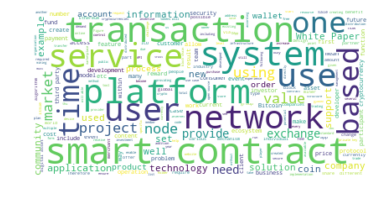

In [27]:
plt.imshow(wordcloud,interpolation = "bilinear")
plt.axis("off")
plt.show()

In [28]:
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability_flesch,readability_fog
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,54.86,12.29
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,38.15,12.92
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,36.02,12.92
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,47.72,12.30
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,14.50,21.83


In [0]:
hasGithub = []

for cleaned_list in data['clean_text']:
  if 'github' in [word.lower() for word in cleaned_list]:
    hasGithub.append(1)
  else:
    hasGithub.append(0)

In [0]:
hasBitcoin = []

for cleaned_list in data['clean_text']:
  if 'bitcoin' in [word.lower() for word in cleaned_list]:
    hasBitcoin.append(1)
  else:
    hasBitcoin.append(0)

In [0]:
hasLinkedIn = []

for cleaned_list in data['clean_text']:
  if 'linkedin' in [word.lower() for word in cleaned_list]:
    hasLinkedIn.append(1)
  else:
    hasLinkedIn.append(0)

In [32]:
data['hasGithub'] = hasGithub
data['hasLinkedIn'] = hasLinkedIn
data['hasBitcoin'] = hasBitcoin
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability_flesch,readability_fog,hasGithub,hasLinkedIn,hasBitcoin
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,54.86,12.29,0,0,1
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,38.15,12.92,0,0,0
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,36.02,12.92,1,1,1
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,47.72,12.30,0,0,0
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,14.50,21.83,0,0,1


In [33]:
data['hasGithub'].value_counts()

0    762
1    122
Name: hasGithub, dtype: int64

In [0]:
import datetime

In [35]:
day_diff = []

for num in range(len(data)):
  date_start = data['first_date'][num]
  date_start_formatted = datetime.datetime.strptime(date_start, "%d/%m/%Y")
  date_end = data['latest_date [9/9/19]'][num]
  date_end_formatted = datetime.datetime.strptime(date_end, "%d/%m/%Y")
  days_diff = date_end_formatted - date_start_formatted
  day_diff.append(days_diff.days)
  
  
len(day_diff)  

884

In [36]:
data['day_diff'] = day_diff
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability_flesch,readability_fog,hasGithub,hasLinkedIn,hasBitcoin,day_diff
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,54.86,12.29,0,0,1,417
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,38.15,12.92,0,0,0,692
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,36.02,12.92,1,1,1,424
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,47.72,12.30,0,0,0,193
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,14.50,21.83,0,0,1,535


(array([146., 330., 303.,  40.,  14.,   9.,   9.,   9.,  20.,   4.]),
 array([  39. ,  267.6,  496.2,  724.8,  953.4, 1182. , 1410.6, 1639.2,
        1867.8, 2096.4, 2325. ]),
 <a list of 10 Patch objects>)

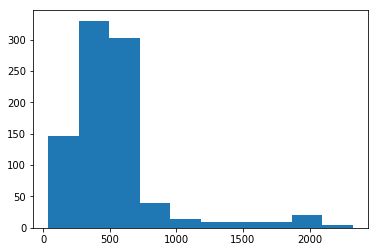

In [37]:
plt.hist(data['day_diff'])

(array([878.,   3.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.  ,  836.32, 1672.64, 2508.96, 3345.28, 4181.6 , 5017.92,
        5854.24, 6690.56, 7526.88, 8363.2 ]),
 <a list of 10 Patch objects>)

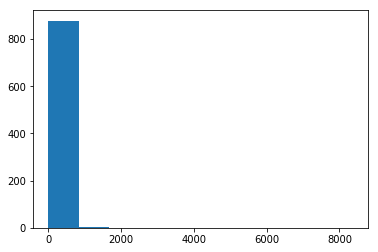

In [38]:
plt.hist(data['readability_fog'])

In [39]:
hasBlockchain = []

for cleaned_text in data['clean_text']:
  if 'blockchain' in [word.lower() for word in cleaned_text]:
    hasBlockchain.append(1)
  else:
    hasBlockchain.append(0)
    
len(hasBlockchain)

884

In [40]:
data['hasBlockchain'] = hasBlockchain
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability_flesch,readability_fog,hasGithub,hasLinkedIn,hasBitcoin,day_diff,hasBlockchain
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,54.86,12.29,0,0,1,417,1
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,38.15,12.92,0,0,0,692,1
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,36.02,12.92,1,1,1,424,1
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,47.72,12.30,0,0,0,193,1
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,14.50,21.83,0,0,1,535,1


In [41]:
data['hasBlockchain'].value_counts()

1    776
0    108
Name: hasBlockchain, dtype: int64

In [0]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('coolwarm')

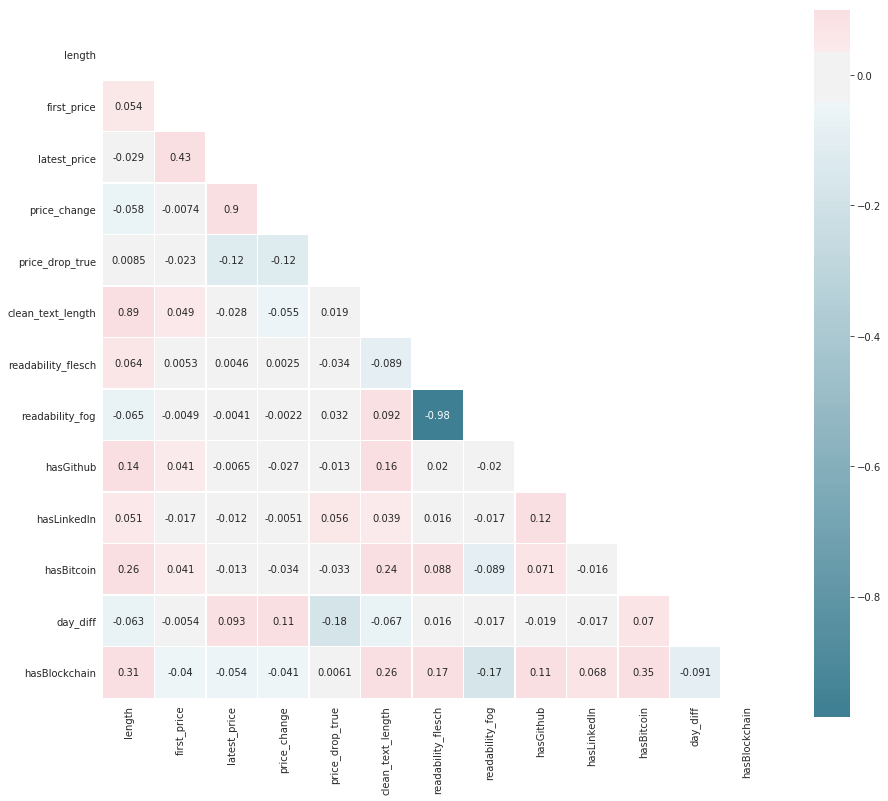

In [43]:
corr = data.corr()

mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize =(15,13))

cmap = sns.diverging_palette(220,10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap , vmax = .1 ,center =0, square=True, annot = True, linewidth = .1)


In [44]:
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability_flesch,readability_fog,hasGithub,hasLinkedIn,hasBitcoin,day_diff,hasBlockchain
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,54.86,12.29,0,0,1,417,1
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,38.15,12.92,0,0,0,692,1
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,36.02,12.92,1,1,1,424,1
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,47.72,12.30,0,0,0,193,1
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,14.50,21.83,0,0,1,535,1


In [45]:
data['clean_text2'][96]

'䈀椀琀挀漀椀渀 䐀椀愀洀漀渀搀 圀栀椀琀攀瀀愀瀀攀爀 ㈀\u3000\u3100㠀⸀\u3000㜀 吀䄀䈀䰀䔀 伀䘀 䌀伀一吀䔀一吀匀 䈀椀琀挀漀椀渀 䐀椀愀洀漀渀搀㨀 唀渀攀愀爀琀栀椀渀最 伀瀀瀀漀爀琀甀渀椀琀礀 昀漀爀 䄀氀氀 䄀戀猀琀爀愀挀琀 䤀渀琀爀漀搀甀挀琀椀漀渀 伀爀椀最椀渀猀 䠀愀爀搀 䘀漀爀欀 吀爀愀渀猀愀挀琀椀漀渀猀 倀爀漀漀昀ⴀ漀昀ⴀ圀漀爀欀 䄀氀最漀爀椀琀栀洀 䰀椀最栀琀渀椀渀最 一攀琀眀漀爀欀 圀愀氀氀攀琀 䘀攀愀琀甀爀攀猀 䠀漀眀 琀漀 䄀挀焀甀椀爀攀 䈀椀琀挀漀椀渀 䐀椀愀洀漀渀搀 刀漀愀搀洀愀瀀 䘀椀渀愀渀挀椀愀氀 匀琀爀愀琀攀最礀 䌀漀渀挀氀甀猀椀漀渀 刀攀昀攀爀攀渀挀攀猀 ㌀ 㐀 㐀 㐀 㔀 㜀 㤀㤀 \u3100\u3000 \u3100\u3100 \u3100㈀ \u3100㈀ \u3100㌀ \u3100㔀 \u3100㘀\u3100㘀 䈀椀琀挀漀椀渀 䐀椀愀洀漀渀搀 唀渀攀愀爀琀栀椀渀最 伀瀀瀀漀爀琀甀渀椀琀礀 昀漀爀 䄀氀氀 䄀戀猀琀爀愀挀琀 䈀椀琀挀漀椀渀 䐀椀愀洀漀渀搀 ⠀䈀䌀䐀⤀ 椀猀 愀 昀漀爀欀 漀昀 䈀椀琀挀漀椀渀㬀 愀琀 瀀爀攀搀攀琀攀爀洀椀渀攀搀 戀氀漀挀欀 栀攀椀最栀琀 㐀㤀㔀㠀㘀㘀Ⰰ 琀栀攀 渀攀眀 挀栀愀椀渀 䈀椀琀挀漀椀渀 䐀椀愀洀漀渀搀 ⠀䈀䌀䐀⤀ 椀猀 愀 昀漀爀欀 漀昀 䈀椀琀挀漀椀渀㬀 愀琀 瀀爀攀搀攀琀攀爀洀椀渀攀搀 戀氀漀挀欀 栀攀椀最栀琀 㐀㤀㔀㠀㘀㘀Ⰰ 琀栀攀 渀攀眀 挀栀愀椀渀 眀愀猀 挀爀攀愀琀攀搀⸀ 䄀猀 琀栀攀 漀爀椀最椀渀愀氀 䈀椀琀挀漀椀渀 ⠀䈀吀䌀⤀ 戀氀漀挀欀挀栀愀椀渀 挀漀渀琀椀渀甀攀猀 漀渀 甀渀愀氀琀攀爀攀搀Ⰰ 琀栀椀猀 渀攀眀 挀爀礀瀀琀漀挀甀爀爀攀渀挀礀 渀漀眀 漀瀀攀爀愀琀攀猀 漀渀 椀琀猀 漀眀渀 挀栀愀椀渀 挀愀氀氀攀搀 ᰠ䈀椀琀挀漀椀渀 䐀椀愀洀漀渀搀ᴠ⸀ 圀椀琀栀 䈀椀琀挀漀椀渀 䐀椀愀洀漀渀搀Ⰰ 洀椀渀攀爀猀 眀椀氀氀 戀攀最椀渀 挀爀攀愀琀椀渀最 戀氀漀挀欀猀 甀猀椀渀最 愀 渀攀眀 瀀爀漀漀昀ⴀ漀昀ⴀ眀漀爀欀 愀氀最漀爀椀琀栀洀 眀栀椀挀栀 戀攀琀琀攀爀 猀攀爀瘀攀猀 匀愀琀漀猀栀椀ᤠ猀 漀爀椀最椀渀愀氀 最漀愀氀 漀昀 欀攀攀瀀椀渀最 䈀椀琀挀漀椀渀 搀攀挀攀渀琀爀愀氀椀稀攀搀⸀ 䈀椀琀挀漀椀渀 䐀椀愀洀漀渀搀 漀û攀爀猀 猀攀瘀攀爀愀

In [46]:
data.dtypes

coin                     object
text                     object
length                    int64
coin_id                  object
first_date               object
first_price             float64
latest_date [9/9/19]     object
latest_price            float64
price_change            float64
price_drop_true           int64
clean_text               object
clean_text_length         int64
clean_text2              object
readability_flesch      float64
readability_fog         float64
hasGithub                 int64
hasLinkedIn               int64
hasBitcoin                int64
day_diff                  int64
hasBlockchain             int64
dtype: object

In [47]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk.corpus import stopwords

In [0]:
def preprocess(text):
  text = text.lower()
  text = re.sub('[^a-zA-Z]+',' ',text)
  words = text.split()
  words2 = [i for i in words if i not in set(stopwords.words('english'))]
  words3 = ' '.join(words2)
  return words3
  

In [0]:
data['clean_text3'] = data['clean_text2'].astype(str).apply(preprocess)

In [51]:
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability_flesch,readability_fog,hasGithub,hasLinkedIn,hasBitcoin,day_diff,hasBlockchain,clean_text3
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,54.86,12.29,0,0,1,417,1,chain consensus protocol jonathan katz thomas ...
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,38.15,12.92,0,0,0,692,1,x open protocol decentralized exchange ethereu...
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,36.02,12.92,1,1,1,424,1,xcert protocol whitepaper authors kristijan se...
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,47.72,12.30,0,0,0,193,1,general information whitepaper july introducti...
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,14.50,21.83,0,0,1,535,1,legal disclaimer purpose white paper present w...


In [55]:
print(data['clean_text3'][99].split())

[]


In [56]:
text_corpus = []

for i in range(len(data)):
  text_corpus.append(data['clean_text3'][i].split())
  
len(text_corpus)

884

In [57]:
data['text_corpus'] = text_corpus
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability_flesch,readability_fog,hasGithub,hasLinkedIn,hasBitcoin,day_diff,hasBlockchain,clean_text3,text_corpus
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,54.86,12.29,0,0,1,417,1,chain consensus protocol jonathan katz thomas ...,"[chain, consensus, protocol, jonathan, katz, t..."
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,38.15,12.92,0,0,0,692,1,x open protocol decentralized exchange ethereu...,"[x, open, protocol, decentralized, exchange, e..."
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,36.02,12.92,1,1,1,424,1,xcert protocol whitepaper authors kristijan se...,"[xcert, protocol, whitepaper, authors, kristij..."
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,47.72,12.30,0,0,0,193,1,general information whitepaper july introducti...,"[general, information, whitepaper, july, intro..."
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,14.50,21.83,0,0,1,535,1,legal disclaimer purpose white paper present w...,"[legal, disclaimer, purpose, white, paper, pre..."


In [58]:
long_string2 = ",".join(list(data['clean_text3'].values))

print(len(long_string2))

27631530


In [0]:
stopwords = set(STOPWORDS)
stopwords.update(["blockchain","user","using","""data","bitcoin","ethereum"])

In [0]:
wordcloud2 = WordCloud(background_color = "white", max_words = 7000, contour_width = 3 , contour_color= 'steelblue', stopwords = stopwords).generate(long_string2) 

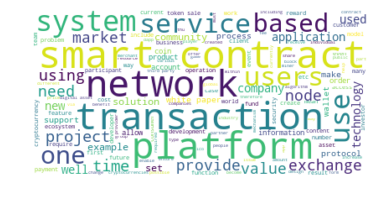

In [63]:
plt.imshow(wordcloud2,interpolation = "bilinear")
plt.axis("off")
plt.show()

In [65]:
print(text_corpus[0][:100])

['chain', 'consensus', 'protocol', 'jonathan', 'katz', 'thomas', 'austin', 'siva', 'dirisala', 'saswata', 'basu', 'dept', 'computer', 'science', 'university', 'maryland', 'chain', 'llc', 'san', 'jose', 'state', 'university', 'chain', 'llc', 'abstract', 'describe', 'chain', 'blockchain', 'ecosystem', 'including', 'new', 'consensus', 'protocol', 'ering', 'fast', 'nality', 'provide', 'proofs', 'security', 'protocol', 'along', 'experiment', 'results', 'validating', 'e', 'ciency', 'realistic', 'network', 'conditions', 'introduction', 'since', 'advent', 'bitcoin', 'nak', 'blockchain', 'revolutionized', 'world', 'cryptocurrencies', 'distributed', 'computation', 'ethereum', 'woo', 'de', 'veloped', 'promise', 'integrating', 'turing', 'complete', 'smart', 'contracts', 'blockchain', 'building', 'distributed', 'applications', 'dapps', 'despite', 'promise', 'blockchain', 'protocols', 'held', 'back', 'slow', 'consensus', 'times', 'example', 'bitcoin', 'transaction', 'con', 'sidered', 'nalized', 'six

In [0]:
#Create a bigram from corpus
import gensim

In [0]:
bigram = gensim.models.Phrases(text_corpus,min_count=20,threshold=20,delimiter= b'_')
bigram_model = gensim.models.phrases.Phraser(bigram)

In [69]:
print(bigram_model[text_corpus][0][:1000])

['chain', 'consensus', 'protocol', 'jonathan', 'katz', 'thomas', 'austin', 'siva', 'dirisala', 'saswata', 'basu', 'dept', 'computer_science', 'university', 'maryland', 'chain', 'llc', 'san', 'jose', 'state', 'university', 'chain', 'llc', 'abstract', 'describe', 'chain', 'blockchain', 'ecosystem', 'including', 'new', 'consensus', 'protocol', 'ering', 'fast', 'nality', 'provide', 'proofs', 'security', 'protocol', 'along', 'experiment', 'results', 'validating', 'e_ciency', 'realistic', 'network', 'conditions', 'introduction', 'since', 'advent', 'bitcoin', 'nak', 'blockchain', 'revolutionized', 'world', 'cryptocurrencies', 'distributed', 'computation', 'ethereum', 'woo', 'de', 'veloped', 'promise', 'integrating', 'turing_complete', 'smart_contracts', 'blockchain', 'building', 'distributed', 'applications_dapps', 'despite', 'promise', 'blockchain', 'protocols', 'held', 'back', 'slow', 'consensus', 'times', 'example', 'bitcoin', 'transaction', 'con', 'sidered', 'nalized', 'six', 'blocks', 'd

In [70]:
norm_corpus_bigrams = [bigram_model[doc] for doc in text_corpus]
dictionary = gensim.corpora.Dictionary(norm_corpus_bigrams)

print('Sample word to number mappings:', list(dictionary.items())[:15])
print('Total Vocabulary Size:', len(dictionary))

Sample word to number mappings: [(0, 'ability'), (1, 'able'), (2, 'absolute'), (3, 'abstract'), (4, 'accepted'), (5, 'access'), (6, 'account'), (7, 'acm'), (8, 'acquire'), (9, 'act'), (10, 'acting'), (11, 'actions'), (12, 'active'), (13, 'added'), (14, 'adding')]
Total Vocabulary Size: 70655


In [71]:
#Filter out words that occur less than 20 whitepapers
dictionary.filter_extremes(no_below=20,no_above=0.6)
print('Total Vocabulary Size:', len(dictionary))

Total Vocabulary Size: 9177


In [72]:
#Transforming corpus into bag of words vectors

bow_corpus = [dictionary.doc2bow(text) for text in norm_corpus_bigrams]
print(bow_corpus[1][:50])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (6, 4), (10, 1), (11, 1), (14, 1), (21, 2), (22, 1), (28, 4), (29, 3), (31, 4), (32, 1), (33, 2), (44, 1), (46, 1), (51, 1), (65, 3), (73, 25), (77, 1), (82, 2), (88, 1), (94, 1), (99, 1), (102, 1), (105, 1), (116, 1), (117, 6), (118, 11), (119, 1), (122, 2), (130, 1), (132, 1), (133, 1), (139, 1), (141, 3), (154, 1), (155, 1), (158, 1), (159, 2), (163, 1), (166, 1), (167, 2), (168, 3), (169, 1), (172, 3), (174, 1), (179, 1)]


In [73]:
print([(dictionary[idx], freq) for idx, freq in bow_corpus[1][:50]])

[('ability', 1), ('absolute', 1), ('abstract', 1), ('accepted', 1), ('acm', 1), ('act', 4), ('added', 1), ('adding', 1), ('advent', 1), ('always', 2), ('among', 1), ('anyone', 4), ('appendix', 3), ('approach', 4), ('arbitrarily', 1), ('arbitrary', 2), ('attacker', 1), ('attempt', 1), ('back', 1), ('building', 3), ('chain', 25), ('changed', 1), ('coins', 2), ('computation', 1), ('conditions', 1), ('considered', 1), ('consists', 1), ('containing', 1), ('daniel', 1), ('dapp', 6), ('dapps', 11), ('david', 1), ('decentralized_applications', 2), ('depends', 1), ('describe', 1), ('described', 1), ('determine', 1), ('di_erent', 3), ('dynamically', 1), ('e_ciency', 1), ('earlier', 1), ('either', 2), ('enough', 1), ('entire', 1), ('entities', 2), ('epoch', 3), ('equal', 1), ('ers', 3), ('eventually', 1), ('executing', 1)]


In [74]:
print('Total number of whitepapers:', len(bow_corpus))

Total number of whitepapers: 884


In [0]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2,workers =2)

In [84]:
for idx, topic in lda_model.print_topics(-1):
  print('Topic {} \nWords: {}'.format(idx, topic))

Topic 0 
Words: 0.004*"chain" + 0.003*"storage" + 0.003*"contract" + 0.002*"trading" + 0.002*"nodes" + 0.002*"coin" + 0.002*"exchanges" + 0.002*"assets" + 0.002*"asset" + 0.002*"foundation"
Topic 1 
Words: 0.048*"n" + 0.026*"r" + 0.019*"l" + 0.013*"e_r" + 0.012*"p" + 0.012*"h_e" + 0.011*"u" + 0.009*"f" + 0.009*"h" + 0.007*"n_g"
Topic 2 
Words: 0.006*"chain" + 0.004*"content" + 0.003*"trading" + 0.003*"whitepaper" + 0.002*"investment" + 0.002*"foundation" + 0.002*"token_sale" + 0.002*"marketing" + 0.002*"research" + 0.002*"node"
Topic 3 
Words: 0.005*"content" + 0.003*"ico" + 0.003*"marketing" + 0.003*"game" + 0.003*"white_paper" + 0.002*"coin" + 0.002*"chain" + 0.002*"advertising" + 0.002*"reward" + 0.002*"whitepaper"
Topic 4 
Words: 0.007*"n" + 0.005*"chain" + 0.003*"r" + 0.003*"nodes" + 0.003*"node" + 0.003*"contract" + 0.002*"l" + 0.002*"p" + 0.002*"ico" + 0.002*"crypto"
Topic 5 
Words: 0.005*"n" + 0.004*"chain" + 0.004*"nodes" + 0.003*"node" + 0.003*"r" + 0.002*"dan" + 0.002*"vote"

In [0]:
lda_model2 = gensim.models.ldamodel.LdaModel(corpus = bow_corpus, id2word = dictionary, num_topics = 20, random_state =100, update_every = 1,
                                            chunksize=100,passes=10,alpha='auto',per_word_topics=True)

In [0]:
from pprint import pprint

In [87]:
pprint(lda_model2.print_topics())

[(0,
  '0.023*"chain" + 0.012*"nodes" + 0.011*"node" + 0.008*"layer" + '
  '0.007*"storage" + 0.006*"internet" + 0.006*"consensus" + 0.006*"mechanism" '
  '+ 0.005*"operation" + 0.005*"architecture"'),
 (1,
  '0.050*"content" + 0.020*"advertising" + 0.009*"reward" + 0.009*"ad" + '
  '0.008*"advertisers" + 0.008*"rewards" + 0.008*"publishers" + 0.006*"social" '
  '+ 0.006*"media" + 0.006*"contents"'),
 (2,
  '0.022*"influencers" + 0.018*"talent" + 0.018*"influencer" + 0.017*"job" + '
  '0.016*"esports" + 0.013*"sports" + 0.011*"fans" + 0.008*"football" + '
  '0.008*"players" + 0.007*"media"'),
 (3,
  '0.019*"nodes" + 0.018*"node" + 0.014*"hash" + 0.014*"chain" + '
  '0.010*"blocks" + 0.008*"proof" + 0.007*"signature" + 0.006*"message" + '
  '0.006*"ledger" + 0.006*"public_key"'),
 (4,
  '0.029*"ai" + 0.025*"contract" + 0.012*"agent" + 0.010*"contracts" + '
  '0.010*"smart_contracts" + 0.009*"execution" + 0.008*"agents" + '
  '0.006*"neural_network" + 0.006*"algorithms" + 0.006*"learning

In [92]:
# Compute Perplexity
print('\nPerplexity:', lda_model2.log_perplexity(bow_corpus))

# Compute Coherence Score
coherence_model_lda = gensim.models.CoherenceModel(model=lda_model2, texts = text_corpus, dictionary = dictionary, coherence = 'c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score:', coherence_lda)


Perplexity: -8.078236625715006


/usr/local/lib/python3.6/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.6/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:317: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))



Coherence Score: nan


In [93]:
!pip install pyldavis

     |████████████████████████████████| 1.6MB 4.9MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=c2efc582f7dd189cdf5a0fb872d1f32189c1066452928791aa950cc8225e9cc6
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyldavis


In [0]:
import pyLDAvis
import pyLDAvis.gensim

In [95]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model2,bow_corpus,dictionary)
vis

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.116955  0.046705       1        1  15.265378
17     0.107131 -0.072334       2        1  13.290071
14     0.083324 -0.040689       3        1   7.587093
7      0.094047 -0.047383       4        1   7.216126
0      0.108102  0.076258       5        1   7.141579
5      0.117489 -0.063885       6        1   6.994020
10     0.095971  0.094201       7        1   6.562001
3      0.032336  0.229481       8        1   6.079626
13    -0.028815  0.242267       9        1   5.836137
19     0.114920 -0.006251      10        1   5.156020
6      0.110554 -0.005537      11        1   4.747262
1      0.052672 -0.087232      12        1   4.141060
4      0.019297  0.143073      13        1   2.732485
9     -0.429100  0.184176      14        1   2.234714
18     0.054195 -0.085895      15        1   1.681459
2     -0.046975 -0.162024      16        1   1.397898
16    -0.069130 -0.135858      17        1   1.224681
12    -0.236505 -0.207623      18        1   0.442671
11    -0.238536 -0.081838      19        1   0.180506
15    -0.057933 -0.019614      20        1   0.089214, topic_info=     Category          Freq             Term         Total  loglift  logprob
329   Default  10313.000000                n  10313.000000  30.0000  30.0000
409   Default   6025.000000                r   6025.000000  29.0000  29.0000
730   Default   5410.000000          content   5410.000000  28.0000  28.0000
4172  Default   4126.000000                l   4126.000000  27.0000  27.0000
1883  Default   3826.000000              ico   3826.000000  26.0000  26.0000
3450  Default   3653.000000                u   3653.000000  25.0000  25.0000
73    Default   6712.000000            chain   6712.000000  24.0000  24.0000
2884  Default   3932.000000             coin   3932.000000  23.0000  23.0000
2718  Default   3402.000000                p   3402.000000  22.0000  22.0000
1824  Default   2200.000000             game   2200.000000  21.0000  21.0000
5652  Default   2215.000000              e_r   2215.000000  20.0000  20.0000
3742  Default   2699.000000        platforms   2699.000000  19.0000  19.0000
82    Default   3686.000000            coins   3686.000000  18.0000  18.0000
338   Default   5013.000000            nodes   5013.000000  17.0000  17.0000
218   Default   2746.000000                h   2746.000000  16.0000  16.0000
1754  Default   2600.000000                f   2600.000000  15.0000  15.0000
848   Default   3395.000000       foundation   3395.000000  14.0000  14.0000
1013  Default   4081.000000             node   4081.000000  13.0000  13.0000
2623  Default   3524.000000       whitepaper   3524.000000  12.0000  12.0000
5664  Default   1831.000000              h_e   1831.000000  11.0000  11.0000
735   Default   4041.000000         contract   4041.000000  10.0000  10.0000
3492  Default   1962.000000                w   1962.000000   9.0000   9.0000
3606  Default   2104.000000               ai   2104.000000   8.0000   8.0000
5086  Default   1006.000000           health   1006.000000   7.0000   7.0000
1683  Default   2391.000000           energy   2391.000000   6.0000   6.0000
858   Default   1408.000000            games   1408.000000   5.0000   5.0000
1203  Default   3935.000000          trading   3935.000000   4.0000   4.0000
458   Default   2989.000000           reward   2989.000000   3.0000   3.0000
3476  Default   1165.000000            video   1165.000000   2.0000   2.0000
275   Default   2314.000000                k   2314.000000   1.0000   1.0000
...       ...           ...              ...           ...      ...      ...
2262  Topic20      3.019736              pwc     60.913467   4.0176  -6.4223
8459  Topic20      2.962378           dealer     69.981766   3.8597  -6.4415
5741  Topic20     20.190893             asia    495.094757   3.8224  -4.5223
6240  Topic20      0.663777            latin     20.556786   3.5889  -7.93

In [96]:
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability_flesch,readability_fog,hasGithub,hasLinkedIn,hasBitcoin,day_diff,hasBlockchain,clean_text3,text_corpus
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,54.86,12.29,0,0,1,417,1,chain consensus protocol jonathan katz thomas ...,"[chain, consensus, protocol, jonathan, katz, t..."
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,38.15,12.92,0,0,0,692,1,x open protocol decentralized exchange ethereu...,"[x, open, protocol, decentralized, exchange, e..."
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,36.02,12.92,1,1,1,424,1,xcert protocol whitepaper authors kristijan se...,"[xcert, protocol, whitepaper, authors, kristij..."
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,47.72,12.30,0,0,0,193,1,general information whitepaper july introducti...,"[general, information, whitepaper, july, intro..."
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,14.50,21.83,0,0,1,535,1,legal disclaimer purpose white paper present w...,"[legal, disclaimer, purpose, white, paper, pre..."


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(data['clean_text3']).toarray()
y = data['hasBlockchain'].values

In [0]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(data['clean_text3']).toarray()
y = data['hasScam'].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [109]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [111]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[115  51]
 [  5   6]]


In [103]:
hasScam = []

for cleaned_text in data['text_corpus']:
  if 'scam' in [word.lower() for word in cleaned_text]:
    hasScam.append(1)
  else:
    hasScam.append(0)
    
len(hasBlockchain)

884

In [104]:
data['hasScam'] = hasScam
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,readability_flesch,readability_fog,hasGithub,hasLinkedIn,hasBitcoin,day_diff,hasBlockchain,clean_text3,text_corpus,hasScam
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,54.86,12.29,0,0,1,417,1,chain consensus protocol jonathan katz thomas ...,"[chain, consensus, protocol, jonathan, katz, t...",0
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,38.15,12.92,0,0,0,692,1,x open protocol decentralized exchange ethereu...,"[x, open, protocol, decentralized, exchange, e...",0
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,36.02,12.92,1,1,1,424,1,xcert protocol whitepaper authors kristijan se...,"[xcert, protocol, whitepaper, authors, kristij...",0
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,47.72,12.30,0,0,0,193,1,general information whitepaper july introducti...,"[general, information, whitepaper, july, intro...",0
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,14.50,21.83,0,0,1,535,1,legal disclaimer purpose white paper present w...,"[legal, disclaimer, purpose, white, paper, pre...",0


In [106]:
data['hasScam'].value_counts()

0    847
1     37
Name: hasScam, dtype: int64